# 

In [73]:
import pandas as pd
import numpy as np

#install
!pip install mlxtend

#association rule minning
from mlxtend.frequent_patterns import apriori, association_rules

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


In [3]:
idmb = pd.read_csv('idmb_cleaned.csv')
idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,2.881524e+07,2278845,9.3
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175.0,USA,R,Francis Ford Coppola,2.461210e+08,1572674,9.2
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220.0,USA,R,Francis Ford Coppola,4.080358e+08,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,2.228318e+08,1780147,8.9


In [4]:
idmb.dtypes

IMBD title ID      object
Original titlÊ     object
Release year       object
Genrë¨             object
Duration          float64
Country            object
Content Rating     object
Director           object
Income            float64
Votes               int64
Score             float64
dtype: object

In [5]:
summary_income = idmb.groupby('Country').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean'),
    Total_Vote = ('Votes', 'sum'),
    Average_Score = ('Score', 'mean')
)
summary_income.sort_values(by='Average_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income,Total_Vote,Average_Score
Country,,,,,
New Zealand,3,2.981433e+09,9.938109e+08,4673978,8.800000
USA,64,2.284035e+10,3.568805e+08,57829308,8.270312
France,3,6.200659e+08,2.066886e+08,2434769,8.200000
UK,12,1.847695e+09,1.539746e+08,10245591,8.075000
Germany,3,4.103003e+08,1.367668e+08,1806027,7.866667
South Korea,2,2.726070e+08,1.363035e+08,972013,8.350000
Japan,4,5.260924e+08,1.315231e+08,1491134,8.375000
India,1,6.026284e+07,6.026284e+07,332217,8.100000
Italy,5,2.842908e+08,5.685815e+07,2022456,8.280000


In [6]:
summary_income.sort_values(by='Total_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income,Total_Vote,Average_Score
Country,,,,,
USA,64,2.284035e+10,3.568805e+08,57829308,8.270312
New Zealand,3,2.981433e+09,9.938109e+08,4673978,8.800000
UK,12,1.847695e+09,1.539746e+08,10245591,8.075000
France,3,6.200659e+08,2.066886e+08,2434769,8.200000
Japan,4,5.260924e+08,1.315231e+08,1491134,8.375000
Germany,3,4.103003e+08,1.367668e+08,1806027,7.866667
Italy,5,2.842908e+08,5.685815e+07,2022456,8.280000
South Korea,2,2.726070e+08,1.363035e+08,972013,8.350000
India,1,6.026284e+07,6.026284e+07,332217,8.100000


Therefore New Zealand mad the highest income per movie, while USA had the overall highest income with New Zealand behind

In [8]:
summary_rating = idmb.groupby('Content Rating').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
)
summary_rating.sort_values(by='Average_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income
Content Rating,,,
PG-13,12,7.615279e+09,6.346066e+08
G,6,3.030506e+09,5.050843e+08
Unrated,25,8.634559e+09,3.453823e+08
PG,11,3.156417e+09,2.869470e+08
R,45,7.450537e+09,1.655675e+08
Approved,1,2.525248e+07,2.525248e+07


In [9]:
summary_rating.sort_values(by='Total_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income
Content Rating,,,
Unrated,25,8.634559e+09,3.453823e+08
PG-13,12,7.615279e+09,6.346066e+08
R,45,7.450537e+09,1.655675e+08
PG,11,3.156417e+09,2.869470e+08
G,6,3.030506e+09,5.050843e+08
Approved,1,2.525248e+07,2.525248e+07


In [10]:
idmb_country_rating = idmb.groupby('Country')['Content Rating'].value_counts().unstack(fill_value=0)
idmb_country_rating

Content Rating,Approved,G,PG,PG-13,R,Unrated
Country,,,,,,
Brazil,0,0,0,0,1,0
Denmark,0,0,0,0,1,0
France,0,0,0,0,1,2
Germany,0,0,0,0,3,0
India,0,0,0,0,0,1
Iran,0,0,0,1,0,0
Italy,1,0,0,1,0,3
Japan,0,0,1,1,0,2
New Zealand,0,0,0,3,0,0


In [11]:
country_summary = pd.merge(summary_income, idmb_country_rating, on = 'Country')
country_summary


,Movie_Count,Total_Income,Average_Income,Total_Vote,Average_Score,Approved,G,PG,PG-13,R,Unrated
Country,,,,,,,,,,,
Brazil,1,3.068079e+07,3.068079e+07,685856,8.600000,0,0,0,0,1,0
Denmark,1,1.584327e+07,1.584327e+07,269616,7.500000,0,0,0,0,1,0
France,3,6.200659e+08,2.066886e+08,2434769,8.200000,0,0,0,0,1,2
Germany,3,4.103003e+08,1.367668e+08,1806027,7.866667,0,0,0,0,3,0
India,1,6.026284e+07,6.026284e+07,332217,8.100000,0,0,0,0,0,1
Iran,1,2.292608e+07,2.292608e+07,214165,7.400000,0,0,0,1,0,0
Italy,5,2.842908e+08,5.685815e+07,2022456,8.280000,1,0,0,1,0,3
Japan,4,5.260924e+08,1.315231e+08,1491134,8.375000,0,0,1,1,0,2
New Zealand,3,2.981433e+09,9.938109e+08,4673978,8.800000,0,0,0,3,0,0


In [40]:
#print top 10 movies with the country
idmb.sort_values(by = 'Income', ascending = False).head(10)

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
57,tt4154796,Avengers: Endgame,2019-04-24,"Action, Adventure, Drama",181.0,USA,Unrated,"Anthony Russo, Joe Russo",2.797801e+09,754786,8.2
55,tt4154756,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149.0,USA,Unrated,"Anthony Russo, Joe Russo",2.048360e+09,796486,8.2
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,"Action, Adventure, Drama",201.0,New Zealand,PG-13,Peter Jackson,1.142271e+09,1604280,8.9
49,tt1345836,The Dark Knight Rises,2012-08-29,"Action, Adventure",164.0,UK,PG-13,Christopher Nolan,1.081133e+09,1480582,8.3
39,tt7286456,Joker,2019-10-03,"Crime, Drama, Thriller",122.0,USA,Unrated,Todd Phillips,1.074251e+09,855097,8.4
81,tt0435761,Toy Story 3,2010-07-07,"Animation, Adventure, Comedy",103.0,USA,G,Lee Unkrich,1.066970e+09,739717,7.8
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
38,tt0110357,The Lion King,1994-11-25,"Animation, Adventure, Drama",88.0,USA,G,"Roger Allers, Rob Minkoff",9.685118e+08,917248,8.4
14,tt0167261,The Lord of the Rings: The Two Towers,2003-01-16,"Action, Adventure, Drama",179.0,New Zealand,PG-13,Peter Jackson,9.512274e+08,1449778,8.7
11,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2002-01-18,"Action, Adventure, Drama",178.0,New Zealand,PG-13,Peter Jackson,8.879343e+08,1619920,8.8


In [38]:
idmb.shape

(100, 11)

In [46]:
# Split by comma, strip spaces, and flatten into one list
all_genre = idmb['Genrë¨'].str.split(',').explode().str.strip()
all_genre

0       Drama
1       Crime
1       Drama
2      Action
2       Crime
       ...   
97    Western
98      Drama
99     Comedy
99    Musical
99    Romance
Name: Genrë¨, Length: 245, dtype: object

In [52]:
genre_unique = all_genre.unique()
genre_unique

array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Mystery', 'Thriller',
       'War', 'Animation', 'Family', 'Comedy', 'Music', 'Horror',
       'Film-Noir', 'Musical'], dtype=object)

In [54]:
all_genre.value_counts()

Genrë¨
Drama        67
Adventure    29
Crime        21
Action       20
Comedy       14
Thriller     13
Mystery      12
Sci-Fi       12
Animation     9
Romance       8
War           8
Biography     7
Fantasy       6
Family        5
Western       4
History       3
Horror        3
Music         2
Film-Noir     1
Musical       1
Name: count, dtype: int64

In [62]:
#all USA movies
idmb_USA = idmb[(idmb['Country'].isin(['USA']))]
idmb_USA.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,2.881524e+07,2278845,9.3
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175.0,USA,R,Francis Ford Coppola,2.461210e+08,1572674,9.2
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220.0,USA,R,Francis Ford Coppola,4.080358e+08,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,2.228318e+08,1780147,8.9


In [64]:
idmb_USA['Genrë¨'].value_counts()

Genrë¨
Crime, Drama                    7
Drama                           5
Crime, Drama, Thriller          4
Biography, Drama, History       3
Action, Adventure, Sci-Fi       3
Action, Adventure, Fantasy      3
Mystery, Thriller               2
Action, Adventure, Drama        2
Drama, War                      2
Animation, Adventure, Comedy    2
Action, Sci-Fi                  2
Drama, Romance                  2
Animation, Adventure, Family    2
Drama, Mystery                  1
Mystery, Romance, Thriller      1
Adventure, Mystery, Thriller    1
Drama, Romance, Sci-Fi          1
Drama, Film-Noir                1
Comedy, Drama, War              1
Animation, Action, Adventure    1
Comedy, Crime, Drama            1
Drama, Mystery, War             1
Action, Adventure               1
Drama, Music                    1
Drama, Western                  1
Comedy, Drama, Family           1
Drama, Romance, War             1
Horror, Mystery, Thriller       1
Animation, Adventure, Drama     1
Crime, 

Now using association rule minning to determine which genre of movie is most marketable. 
The object
1. Determine genre with high Income (genre together and single) - make income atleast.
2. Genre attracts more people to view
3. Genre with more positive review

In [81]:
#encode the genre column
genre = idmb['Genrë¨'].str.get_dummies(sep = ',')

#remove whitespaces
genre.columns = genre.columns.str.strip()

genre

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
#setting the threshold
income_threshold = idmb['Income'].median()
votes_threshold = idmb['Votes'].median()
score_threshold = idmb['Score'].median()

#setting maximum values for each objective
idmb['High_Income'] = idmb['Income'] >= income_threshold
idmb['High_Votes'] = idmb['Votes'] >= votes_threshold
idmb['High_Score'] = idmb['Score'] >= score_threshold

In [89]:
#combining genre one-hot encoding with target labels
genre_features = pd.concat([genre, idmb[['High_Income', 'High_Votes', 'High_Score']]], axis = 1)
genre_features.head()

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Biography,Comedy,Crime,Drama,Horror,Mystery,Western,High_Income,High_Votes,High_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,False,True,True
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,True,True,True
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True


In [91]:
#generate frequent itemsets
frequent_items = apriori(genre_features, min_support = 0.05, use_colnames = True)

#generating rules with at least one of the target labels as the consequent
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.6)

rules

C:\Users\uchiv\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Adventure),(Drama),0.07,0.25,0.07,1.000000,4.000000,1.0,0.0525,inf,0.806452,0.280000,1.000000,0.640000
1,(Adventure),(Action),0.07,0.19,0.14,2.000000,10.526316,1.0,0.1267,inf,0.973118,1.166667,2.234568,1.368421
2,(Action),(Adventure),0.19,0.07,0.14,0.736842,10.526316,1.0,0.1267,3.534000,1.117284,1.166667,0.717035,1.368421
3,(Adventure),(Animation),0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
4,(Animation),(Adventure),0.09,0.07,0.08,0.888889,12.698413,1.0,0.0737,8.370000,1.012363,1.000000,0.880526,1.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,"(Drama, High_Income)","(Crime, High_Votes, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
295,"(Drama, High_Votes)","(Crime, High_Income, High_Score)",0.12,0.08,0.08,0.666667,8.333333,1.0,0.0704,2.760000,1.000000,0.666667,0.637681,0.833333
296,"(Crime, High_Score)","(Drama, High_Votes, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
297,"(Crime, High_Income)","(Drama, High_Votes, High_Score)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000


In [93]:
#filter for rules where High Income, High Votes or High Score is the consequence
rules_target = rules[rules['consequents'].apply(lambda x: any(item in x for item in ['High_Income', 'High_Votes', 'High_Score']))]

rules_target

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Adventure),(High_Income),0.07,0.50,0.21,3.000000,6.000000,1.0,0.1750,inf,0.896057,0.583333,5.000000,1.710000
6,(Adventure),(High_Votes),0.07,0.50,0.15,2.142857,4.285714,1.0,0.1150,inf,0.824373,0.357143,3.285714,1.221429
7,(Adventure),(High_Score),0.07,0.51,0.11,1.571429,3.081232,1.0,0.0743,inf,0.726295,0.234043,2.166181,0.893557
12,(Fantasy),(High_Income),0.06,0.50,0.05,0.833333,1.666667,1.0,0.0200,3.000000,0.425532,0.098039,0.666667,0.466667
13,(Sci-Fi),(High_Income),0.12,0.50,0.08,0.666667,1.333333,1.0,0.0200,1.500000,0.284091,0.148148,0.333333,0.413333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,"(Drama, High_Income)","(Crime, High_Votes, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
295,"(Drama, High_Votes)","(Crime, High_Income, High_Score)",0.12,0.08,0.08,0.666667,8.333333,1.0,0.0704,2.760000,1.000000,0.666667,0.637681,0.833333
296,"(Crime, High_Score)","(Drama, High_Votes, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
297,"(Crime, High_Income)","(Drama, High_Votes, High_Score)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000


Confidence: probability of outcome given the genre combination

Lift:how much likely the outcome is compared to random chance

support: proportion of movies with that genre combo.

In [96]:
rules_target.sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,(Adventure),"(High_Income, Animation)",0.07,0.08,0.08,1.142857,14.285714,1.0,0.0744,inf,1.000000,1.142857,1.155280,1.071429
132,(Adventure),"(Drama, High_Votes, High_Income)",0.07,0.06,0.06,0.857143,14.285714,1.0,0.0558,6.580000,1.000000,0.857143,0.848024,0.928571
294,"(Drama, High_Income)","(Crime, High_Votes, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
291,"(Crime, High_Votes, High_Score)","(Drama, High_Income)",0.09,0.07,0.08,0.888889,12.698413,1.0,0.0737,8.370000,1.012363,1.000000,0.880526,1.015873
286,"(Drama, High_Votes, High_Score)","(Crime, High_Income)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000
297,"(Crime, High_Income)","(Drama, High_Votes, High_Score)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000
33,(Adventure),"(Drama, High_Income)",0.07,0.07,0.06,0.857143,12.244898,1.0,0.0551,6.510000,0.987455,0.750000,0.846390,0.857143
288,"(Drama, High_Votes, High_Income)","(Crime, High_Score)",0.06,0.11,0.08,1.333333,12.121212,1.0,0.0734,inf,0.976064,0.888889,1.374532,1.030303
296,"(Crime, High_Score)","(Drama, High_Votes, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
245,(Adventure),"(Drama, Action, High_Votes, High_Income)",0.07,0.06,0.05,0.714286,11.904762,1.0,0.0458,3.290000,0.984946,0.625000,0.696049,0.773810


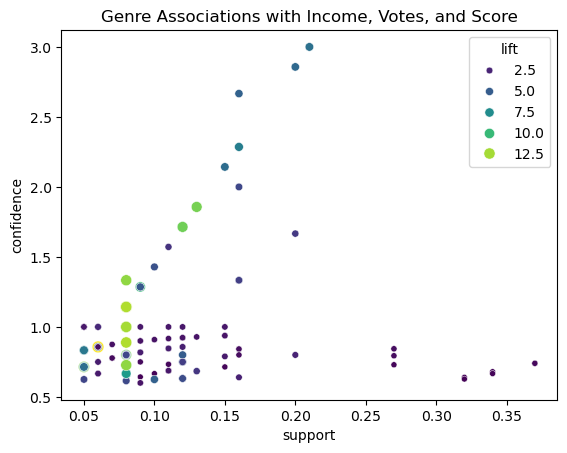

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rules_target, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Genre Associations with Income, Votes, and Score')
plt.show()
